In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')


# get the required dataset
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

There are 277699 duplicated job posting in multiple sites


In [163]:

#handling same job posted on multiple sites
length_df=len(df)
lenght_spam_removed_df=len(df.drop_duplicates(subset=['job_title','company_name']))
print('There are',length_df-lenght_spam_removed_df, 'duplicated job posting in multiple sites')
df=df.drop_duplicates(subset=['job_title','company_name'])
#only look for jobs where jobs are realated to data
df.job_title_short.unique()

# Define a regular expression pattern to match "Data", "Analyst", or "Machine Learning" in job titles
pattern = r'(Data|Analyst|Machine Learning)'

# Filter the DataFrame based on 'job_title_short' containing 'Data', 'Analyst', or 'Machine Learning'
df = df[df['job_title_short'].str.contains(pattern, case=False, na=False)]

# Check the result
df.job_title_short.unique()

There are 277699 duplicated job posting in multiple sites


array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Senior Data Scientist'], dtype=object)

In [164]:
#cleaning data
import ast
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
def convert_job_skills(x):
    '''Convert string to list'''
    try:
        if pd.notna(x):
            return ast.literal_eval(x)
        else:
            return x
    except (ValueError, SyntaxError):
        return x

df['job_skills'] = df['job_skills'].apply(convert_job_skills)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."



To analyze the data job market in Pakistan effectively, we compare it with several other countries that are economically comparable, have similar demographic factors, and face related job market challenges.

### Selected Countries

The following countries are included in the comparison due to their economic development levels, demographic characteristics, and job market conditions similar to Pakistan:

- **Turkey**: Similar economic structure and demographic challenges.
- **Bangladesh**: Similar economic conditions and demographic factors.
- **Philippines**: Comparable economic challenges and job market trends.
- **Nigeria**: Similar economic and demographic profile.
- **Egypt**: Comparable in economic development and youth demographics.

### Data Columns for Analysis

We will use the following columns for comparison:
- **`job_title_short`** and **`job_title`**
- **`salary_year_avg`** and **`salary_hour_avg`**
- **`job_skills`** and **`job_type_skills`**
- **`job_work_from_home`** and **`job_health_insurance`**

This approach will allow us to gain insights into how Pakistan's data job market compares with these countries in terms of job roles, salaries, skills, and benefits.


In [165]:

#handling same job posted on multiple sites
length_df=len(df)
lenght_spam_removed_df=len(df.drop_duplicates(subset=['job_title','company_name']))
print('There are',length_df-lenght_spam_removed_df, 'duplicated job posting in multiple sites')
df=df.drop_duplicates(subset=['job_title','company_name'])
#only look for jobs where jobs are realated to data
df.job_title_short.unique()

# Define a regular expression pattern to match "Data", "Analyst", or "Machine Learning" in job titles
pattern = r'(Data|Analyst|Machine Learning)'

# Filter the DataFrame based on 'job_title_short' containing 'Data', 'Analyst', or 'Machine Learning'
df = df[df['job_title_short'].str.contains(pattern, case=False, na=False)]

# Check the result
df.job_title_short.unique()
# Define the countries for comparison
comparison_countries = ['Pakistan', 'Turkey', 'Bangladesh', 'Nigeria', 'Egypt']

# Filter the DataFrame for these countries
df= df[df['job_country'].isin(comparison_countries)]

# Display basic statistics for the selected countries
print("Basic Statistics for Comparison Countries:")
country_salary_stats =df.groupby('job_country').agg({
    'salary_year_avg': ['mean', 'std'],
    'job_title_short': 'count'
})
# Rounding 'mean' and 'std' columns for 'salary_year_avg'
country_salary_stats[('salary_year_avg', 'mean')] = country_salary_stats[('salary_year_avg', 'mean')].round(1)
country_salary_stats[('salary_year_avg', 'std')] = country_salary_stats[('salary_year_avg', 'std')].round()

country_salary_stats

There are 0 duplicated job posting in multiple sites
Basic Statistics for Comparison Countries:


salary_year_avg          job_title_short
                       mean      std           count
job_country                                         
Bangladesh          42750.0  37123.0             186
Egypt               75847.4  19420.0            1794
Nigeria            100741.1  34693.0             703
Pakistan            69287.5  27970.0            1371
Turkey              94692.6  32394.0             903

In [142]:
for country in comparison_countries:
    print(country, "has","[",len(df[(df["job_location"]==country) & (df["salary_year_avg"].notna())]),"]", "jobs with average yearly salary mentioned")
    

Pakistan has [ 2 ] jobs with average yearly salary mentioned
Turkey has [ 0 ] jobs with average yearly salary mentioned
Bangladesh has [ 0 ] jobs with average yearly salary mentioned
Nigeria has [ 1 ] jobs with average yearly salary mentioned
Egypt has [ 3 ] jobs with average yearly salary mentioned


Due to the limited and uneven representation of job data across different countries, this dataset is not sufficient for comprehensive analysis or comparison of salary trends across these countries. it may not accurately reflect the salary landscape in these countries.


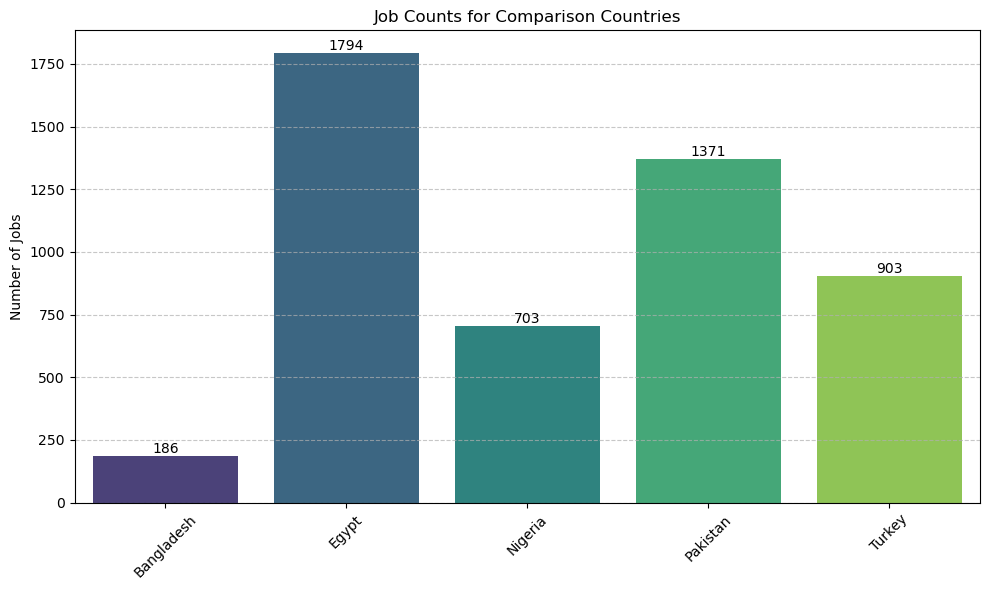

In [155]:
# Prepare data for plotting
job_counts = country_salary_stats[('job_title_short', 'count')].reset_index()

# Create a bar chart using Seaborn and the object-oriented approach
fig, ax = plt.subplots(figsize=(10, 6))
bars = sns.barplot(x='job_country', y=('job_title_short', 'count'), data=job_counts, palette='viridis', ax=ax)

# Customize the plot
ax.set_title('Job Counts for Comparison Countries')
ax.set_xlabel('')
ax.set_ylabel('Number of Jobs')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height, 
        f'{int(height)}', 
        ha='center', va='bottom'
    )

# Show the plot
plt.tight_layout()
plt.show()

In [168]:
df[df['company_name']=='Vodafone']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
20148,Business Analyst,Business Analytics Lead_VOIS,"Giza, El Omraniya, Egypt",via Jobs At Vodafone,Full-time,False,Egypt,2023-08-14 13:16:32,False,False,Egypt,None,NaN,NaN,Vodafone,"[sql, no-sql, python, sql server, mysql, oracl...","{'analyst_tools': ['power bi', 'tableau', 'qli..."
25944,Data Engineer,Office LAN Network Engineer _VOIS,"Giza, El Omraniya, Egypt",via Jobs At Vodafone,Full-time,False,Egypt,2023-01-17 13:36:32,True,False,Egypt,None,NaN,NaN,Vodafone,None,None
27682,Data Engineer,Customer Data Repository Engineer _VOIS,"Giza, El Omraniya, Egypt",via Jobs At Vodafone,Full-time,False,Egypt,2023-02-21 14:04:04,False,False,Egypt,None,NaN,NaN,Vodafone,None,None
31333,Data Engineer,Big Data & AI Engineer,"İstanbul, Türkiye",via Jobs At Vodafone,Full-time,False,Turkey,2023-04-05 13:23:55,False,False,Turkey,None,NaN,NaN,Vodafone,"[python, java, scala, bash, nosql, cassandra, ...","{'databases': ['cassandra'], 'libraries': ['sp..."
34581,Data Scientist,Data and Analytics Transformation Lead_VOIS,"Giza, El Omraniya, Egypt",via Jobs At Vodafone,Full-time,False,Egypt,2023-01-11 13:34:33,False,False,Egypt,None,NaN,NaN,Vodafone,[gcp],{'cloud': ['gcp']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667969,Senior Data Scientist,Data Quality Monitoring Sr. Specialist _VOIS,"Giza, El Omraniya, Egypt",via Jobs At Vodafone,Full-time,False,Egypt,2023-01-10 10:51:21,False,False,Egypt,None,NaN,NaN,Vodafone,"[sql, python, gcp]","{'cloud': ['gcp'], 'programming': ['sql', 'pyt..."
671042,Data Scientist,Digital Analytics Specialist (Adobe Analytics)...,"Giza, El Omraniya, Egypt",via Jobs At Vodafone,Full-time,False,Egypt,2023-11-12 10:34:56,False,False,Egypt,None,NaN,NaN,Vodafone,"[sql, javascript, css, html]","{'programming': ['sql', 'javascript', 'css', '..."
778621,Data Engineer,BI Data Analytics Engineer,"Cairo, Egypt",via Trabajo.org,Full-time,False,Egypt,2023-11-15 05:42:27,False,False,Egypt,None,NaN,NaN,Vodafone,[sql],{'programming': ['sql']}
779910,Senior Data Scientist,Big Data Sr Specialist,Egypt,via Trabajo.org,Full-time,False,Egypt,2023-12-13 05:36:08,False,False,Egypt,None,NaN,NaN,Vodafone,"[java, scala, python, nosql, cassandra, redis,...","{'cloud': ['aws'], 'databases': ['cassandra', ..."


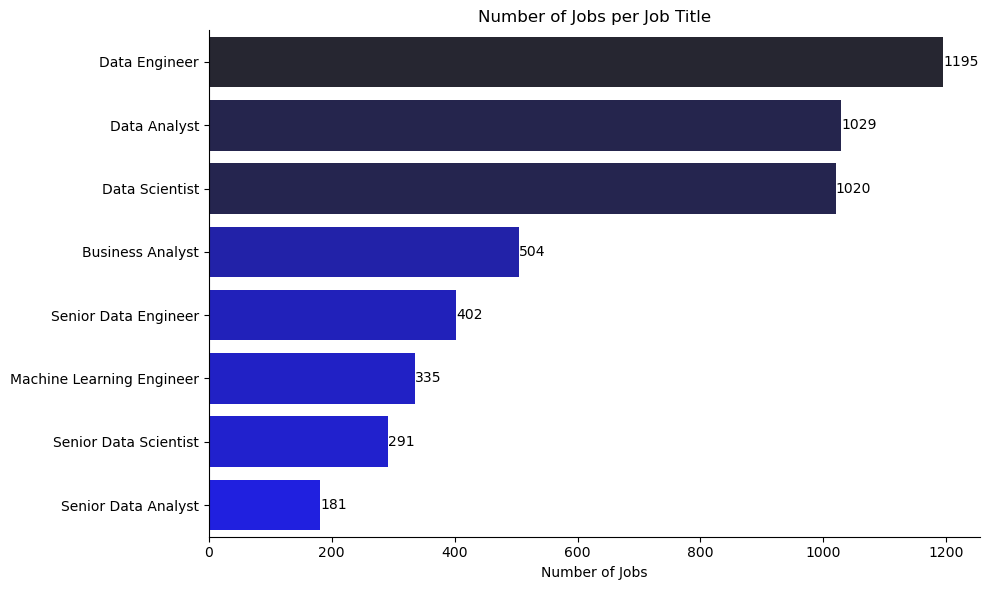

In [156]:
# Prepare data for plotting
df_plot = df['job_title_short'].value_counts().to_frame().reset_index()
df_plot.columns = ['job_title_short', 'count']

# Create a bar chart using Seaborn and the object-oriented approach
fig, ax = plt.subplots(figsize=(10, 6))
bars = sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False, ax=ax)

# Customize the plot
ax.set_title('Number of Jobs per Job Title')
ax.set_xlabel('Number of Jobs')
ax.set_ylabel('')
sns.despine()

# Add counts on top of each bar
for bar in bars.patches:
    width = bar.get_width()
    ax.text(
        width, bar.get_y() + bar.get_height() / 2, 
        f'{int(width)}', 
        ha='left', va='center'
    )

# Show the plot
plt.tight_layout()
plt.show()

In [161]:
df['company_name'].value_counts()

company_name
Vodafone             84
Data2Bots            37
JP Morgan Chase      32
Talent Pal           31
CareerMatch          28
                     ..
Fineksus              1
Libertex Group        1
Organon Analytics     1
Community Phone       1
Digiterra             1
Name: count, Length: 2740, dtype: int64

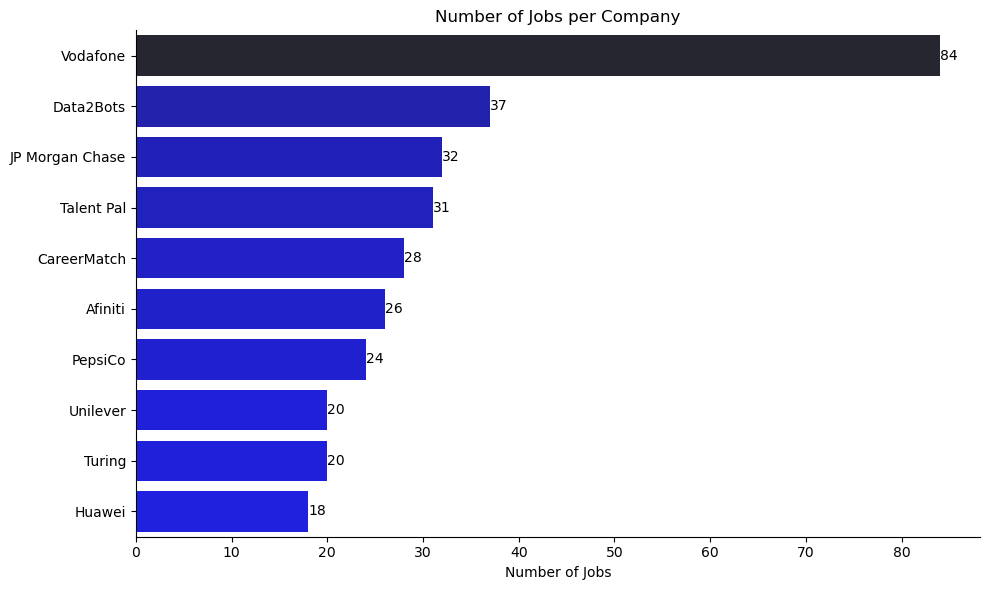

In [169]:
# Prepare data for plotting
df_plot = df['company_name'].value_counts().to_frame().iloc[:10].reset_index()
df_plot.columns = ['company_name', 'count']

# Create a bar chart using Seaborn and the object-oriented approach
fig, ax = plt.subplots(figsize=(10, 6))
bars = sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False, ax=ax)

# Customize the plot
ax.set_title('Number of Jobs per Company')
ax.set_xlabel('Number of Jobs')
ax.set_ylabel('')
sns.despine()

# Add counts on top of each bar
for bar in bars.patches:
    width = bar.get_width()
    ax.text(
        width, bar.get_y() + bar.get_height() / 2, 
        f'{int(width)}', 
        ha='left', va='center'
    )

# Show the plot
plt.tight_layout()
plt.show()

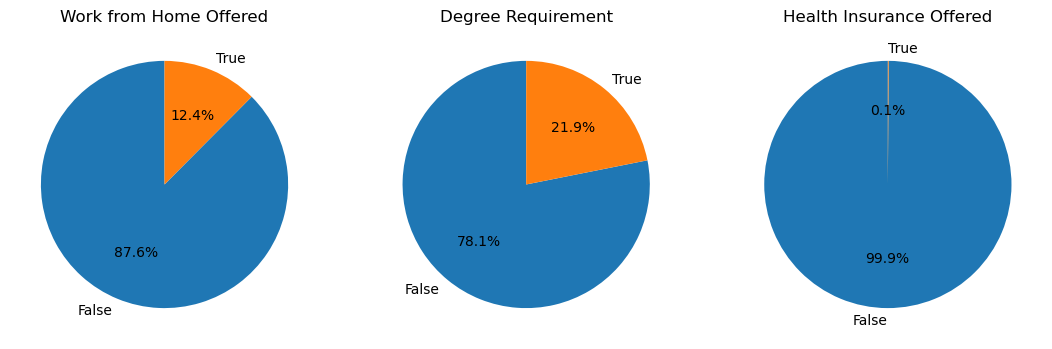

In [146]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

# Create a figure with 3 subplots (1 row, 3 columns)
fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

# Loop over each item in the dictionary
for i, (column, title) in enumerate(dict_column.items()):
    # Generate a pie chart for each column
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [172]:
df_pak = df[df['job_country'] == 'Pakistan']
df_pak.value_counts('company_name')
df_pak[df_pak['company_name']=='JP Morgan Chase']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
74834,Data Scientist,Data Science Analyst Expert,Pakistan,via Bayt.com,Full-time,False,Pakistan,2023-10-05 00:16:32,False,False,Pakistan,None,NaN,NaN,JP Morgan Chase,"[python, sql, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
78109,Data Analyst,Data Analyst,"Hyderabad, Pakistan",via Melga,Full-time,False,Pakistan,2023-03-13 00:14:29,False,False,Pakistan,None,NaN,NaN,JP Morgan Chase,"[sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
78208,Data Analyst,Data Visualization Analyst,Pakistan,via Bayt.com,Full-time,False,Pakistan,2023-07-08 00:23:45,True,False,Pakistan,None,NaN,NaN,JP Morgan Chase,"[python, matplotlib, plotly, tableau, power bi...","{'analyst_tools': ['tableau', 'power bi', 'qli..."
80902,Data Engineer,Lead Software Engineer - Data Engineer,Pakistan,via Bayt.com,Full-time,False,Pakistan,2023-11-25 00:16:36,True,False,Pakistan,None,NaN,NaN,JP Morgan Chase,None,None
83686,Data Analyst,Client Data Lead,Pakistan,via ApplyCV,Full-time,False,Pakistan,2023-04-14 00:21:07,False,False,Pakistan,None,NaN,NaN,JP Morgan Chase,"[sql, sas, sas, r, excel, visio, powerpoint, a...","{'analyst_tools': ['sas', 'excel', 'visio', 'p..."
84120,Data Analyst,Global Technology Assessments Data Analyst,Pakistan,via Bayt.com,Full-time,False,Pakistan,2023-04-25 00:17:43,True,False,Pakistan,None,NaN,NaN,JP Morgan Chase,"[sql, python, r, mysql, oracle, hadoop, spark,...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
85451,Data Engineer,Lead Software Engineer- Data,Pakistan,via Bayt.com,Full-time,False,Pakistan,2023-05-05 00:28:41,False,False,Pakistan,None,NaN,NaN,JP Morgan Chase,"[aws, spark, kafka]","{'cloud': ['aws'], 'libraries': ['spark', 'kaf..."
85646,Data Engineer,Data Engineer II - Oracle Database Engineer,Pakistan,via Bayt.com,Full-time,False,Pakistan,2023-05-25 00:13:13,True,False,Pakistan,None,NaN,NaN,JP Morgan Chase,"[sql, nosql]","{'programming': ['sql', 'nosql']}"
87572,Data Engineer,VP-Data Engineer,"Hyderabad, Pakistan",via Bayt.com,Full-time,False,Pakistan,2023-01-18 00:18:01,False,False,Pakistan,None,NaN,NaN,JP Morgan Chase,"[nosql, mongo, java, python, dynamodb, cassand...","{'cloud': ['aws', 'redshift'], 'databases': ['..."
88246,Data Engineer,REF Data Site Reliability Engineer,"Hyderabad, Pakistan",via Melga,Full-time,False,Pakistan,2023-03-08 00:35:45,False,False,Pakistan,None,NaN,NaN,JP Morgan Chase,"[mongodb, mongodb, python, java, bash, powersh...","{'cloud': ['oracle'], 'databases': ['mongodb']..."


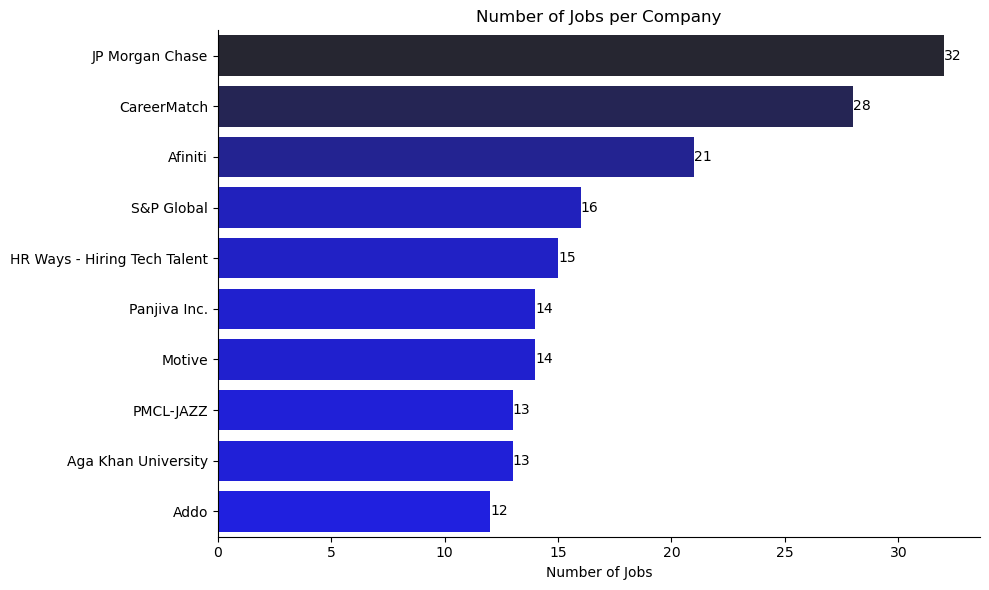

In [179]:
# Prepare data for plotting
df_plot = df_pak['company_name'].value_counts().to_frame().iloc[:10].reset_index()
df_plot.columns = ['company_name', 'count']

# Create a bar chart using Seaborn and the object-oriented approach
fig, ax = plt.subplots(figsize=(10, 6))
bars = sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False, ax=ax)

# Customize the plot
ax.set_title('Number of Jobs per Company')
ax.set_xlabel('Number of Jobs')
ax.set_ylabel('')
sns.despine()

# Add counts on top of each bar
for bar in bars.patches:
    width = bar.get_width()
    ax.text(
        width, bar.get_y() + bar.get_height() / 2, 
        f'{int(width)}', 
        ha='left', va='center'
    )

# Show the plot
plt.tight_layout()
plt.show()

In [178]:
len(df[df['company_name']=='S&P Global'])

16